In [61]:
import pandas as pd

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.08.31/left_right_data.xlsx")

data


,FORCE_L,X_COR_L,Y_COR_L,COPX,COPY,FSR_L,FSRNONOISE_L,FSR_mass_L,FORCE_R,X_COR_R,Y_COR_R,COPX.1,COPY.1,FSR_R,FSRNONOISE_R,FSR_mass_R
0,0,NaN,NaN,5.575461,26.583173,24,0,0.0,0,NaN,NaN,5.575461,26.583173,26,0,0.0
1,0,NaN,NaN,5.578947,26.571607,24,0,0.0,0,NaN,NaN,5.578947,26.571607,27,0,0.0
2,0,NaN,NaN,5.584776,26.568425,26,0,0.0,0,NaN,NaN,5.584776,26.568425,24,0,0.0
3,0,NaN,NaN,5.575269,26.562586,28,0,0.0,0,NaN,NaN,5.575269,26.562586,22,0,0.0
4,0,NaN,NaN,5.583772,26.569648,26,0,0.0,0,NaN,NaN,5.583772,26.569648,24,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,0,NaN,NaN,5.935185,26.638889,29,0,0.0,0,NaN,NaN,5.935185,26.638889,29,0,0.0
863,0,NaN,NaN,5.940000,26.580000,27,0,0.0,0,NaN,NaN,5.940000,26.580000,30,0,0.0
864,0,NaN,NaN,6.000000,26.558140,25,0,0.0,0,NaN,NaN,6.000000,26.558140,31,0,0.0
865,0,NaN,NaN,5.607143,26.428571,25,0,0.0,0,NaN,NaN,5.607143,26.428571,33,0,0.0


In [62]:
data.isnull().sum()

FORCE_L           0
X_COR_L         388
Y_COR_L         629
COPX              0
COPY              0
FSR_L             0
FSRNONOISE_L      0
FSR_mass_L        1
FORCE_R           0
X_COR_R         358
Y_COR_R         358
COPX.1            0
COPY.1            0
FSR_R             0
FSRNONOISE_R      0
FSR_mass_R        0
dtype: int64

In [63]:
columns=data.columns
columns

Index(['FORCE_L', 'X_COR_L', 'Y_COR_L', 'COPX', 'COPY', 'FSR_L',
       'FSRNONOISE_L', 'FSR_mass_L', 'FORCE_R', 'X_COR_R', 'Y_COR_R', 'COPX.1',
       'COPY.1', 'FSR_R', 'FSRNONOISE_R', 'FSR_mass_R'],
      dtype='object')

In [64]:
data.isnull().sum()

FORCE_L           0
X_COR_L         388
Y_COR_L         629
COPX              0
COPY              0
FSR_L             0
FSRNONOISE_L      0
FSR_mass_L        1
FORCE_R           0
X_COR_R         358
Y_COR_R         358
COPX.1            0
COPY.1            0
FSR_R             0
FSRNONOISE_R      0
FSR_mass_R        0
dtype: int64

In [65]:
for i in columns:
    data[i].fillna(data[i].mean(),inplace=True)

In [66]:
data.isnull().sum()

FORCE_L         0
X_COR_L         0
Y_COR_L         0
COPX            0
COPY            0
FSR_L           0
FSRNONOISE_L    0
FSR_mass_L      0
FORCE_R         0
X_COR_R         0
Y_COR_R         0
COPX.1          0
COPY.1          0
FSR_R           0
FSRNONOISE_R    0
FSR_mass_R      0
dtype: int64

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [68]:
data.drop(labels=['X_COR_L','Y_COR_L','COPX','COPY','FSR_L','FSRNONOISE_L','FSR_mass_L','X_COR_R','Y_COR_R','COPX.1','COPY.1','FSR_R','FSRNONOISE_R','FSR_mass_R'],axis=1,inplace=True)
data

,FORCE_L,FORCE_R
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
862,0,0
863,0,0
864,0,0
865,0,0


In [69]:
def crosscorr(datax, datay, lag=0, wrap=False):
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

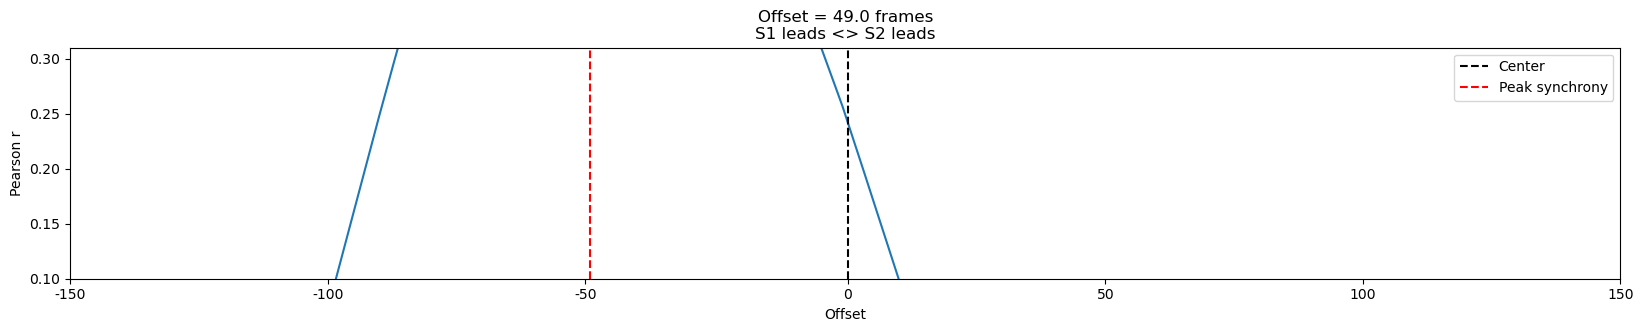

In [71]:
d1 = data['FORCE_L']
d2 = data['FORCE_R']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs) # 최대 correlation 값 가지는 offset 계산

f,ax=plt.subplots(figsize=(20,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[-.91,.91],xlim=[0,301], xlabel='Offset_about_FSR',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()
# 아마도 반복되는 양상이 없어서 그런듯
# Offset이 왼쪽에 있으면, S1이 리드하과 S2가 따라오는 것
# shift(-150)이 d2에 대해서 적용되고, d2의 미래와 d1의 현재간에 correlation 계산 하는 것. 즉, offset이 음수이면 d1이 선행한다는 뜻
# 이것도 결국 global level로 correlation 측정하는 것. 시차 두면서.